<a href="https://colab.research.google.com/github/Z3Gu1/Notebooks/blob/main/Coracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP de Análise de Dados e Boas Práticas
Profs. Tatiana Escovedo e Hugo Villamizar

##Aluno: José Guilherme Campos Machado

Este trabalho é referente ao MVP da primeira sprint (Análise Exploratória e Pré-Processamento de Dados) do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-RJ

##1.0 Definição do problema

Sabemos que os problemas cardíacos estão entre as principais causas de mortes no mundo e que entre os principais fatores de risco que podem levar a eles podemos citar a idade, o sexo, histórico familiar, altas taxas de colesterol, pressão arterial elevada, tabagismo, sedentarismo e obesidade.
Nem todos esses fatores estão presentes nesse estudo mas alguns deles nos guiarão por esse trabalho de analise exploratória e pré processamento na busca por padrões e tendências que possam ser úteis na prevenção e tratamento de doenças cardíacas, nos fornecendo insights valiosos para futuras pesquisas e intervenções médicas.


In [1]:
# Importação da imagem 
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/Z3Gu1/Imagens/5e16249947e7fc9d33ecbe1fce77c9a1c4506193/heartdisease.jpg')



O conjunto de dados Heart Disease UCI contém informações sobre pacientes que foram avaliados para a presença de doença cardíaca. É um arquivo no formato csv e não contém os nomes das colunas.


O dataset adotado é composto por informações referentes a pacientes do hospital de Cleveland. O conjunto consiste nos dados de 303 indivíduos. Há 14 colunas (que foram extraídas de um conjunto maior de 75). Não há valores ausentes. A tarefa de classificação é tentar antecipar se uma pessoa tem tendência a desenvolver complicações cardíacas.


Este é um problema de aprendizado supervisionado e o campo target contém os valores 0 para ausência de doenças cardíacas, 1 para presença de doenças cardíacas e 2 3 e 4 para presença de doenças cardíacas com diferentes graus de gravidade.






Para esse trabalho foram levantadas algumas hipóteses:

1. A idade e o sexo do paciente podem estar correlacionados com a presença de doença cardíaca?
2. Certos fatores de risco, como hipertensão e colesterol alto, podem ser indicadores importantes para a presença de doença cardíaca?
3. Os resultados de testes cardíacos, como o ECG, podem fornecer informações úteis para prever a presença de doença cardíaca?




O dataset chama "Cleveland Heart Disease", pertence ao acervo do site UCI e pode ser consultado em https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

Para facilitar o entendimento no decorrer das análises os nomes dos atributos originais do dataset foram traduzidos ou adaptados.


**Informações sobre os atributos:**
1. **idade** - em anos
2. **sexo** - **1** masculino e **0** feminino
3. **angina** - Dores no peito (chest pain) (**1** angina tipica, **2** angina atipica, **3** dor torácica não anginal, **4** assintomático)
4. **pa** - pressão arterial em repouso (em mm Hg na adimissão ao hospital)
5. **colesterol** - colesterol mg/dl
6. **glicose** - glicose em jejum (fasting blood sugar) > 120 mg/dl (**1** verdadeiro, **0** falso)
7. **ecg** - eletrocardiograma repouso (**0** normal, **1** anormalidades da onda ST-T , **2** hipertrofia ventricular esquerda provável ou definitiva)
8. **bpm** -  batimentos cardiacos maximo por minuto alcançado
9. **exang** - exercicio induz angina? (**1** sim, **0** não)
10. **depressão do segmento ST** - "oldpeak", induzida pelo exercício em relação ao repouso. Esse atributo mede a depressão do segmento ST do eletrocardiograma (ECG) induzida pelo exercício físico em relação ao repouso. A depressão do segmento ST é uma medida da isquemia miocárdica, que é uma redução do suprimento de sangue ao músculo cardíaco, geralmente devido a uma obstrução nas artérias coronárias. É expresso em milímetros (mm).  **Valores elevados de "Oldpeak" podem indicar uma isquemia miocárdica mais acentuada** e um risco maior de complicações cardíacas.
11. **inclinação do segmento ST** - "Slope" Ou elevação do ponto J no eletrocardiograma (ECG)
      1. indica uma inclinação ascendente do segmento ST durante o pico do exercício, o que é considerado normal e indica menor risco de eventos cardiovasculares futuros
      2. indica um segmento ST plano durante o pico do exercício, o que pode indicar uma doença arterial coronariana em estágio inicial e um risco moderado de eventos cardiovasculares futuros
      3. indica uma inclinação descendente do segmento ST durante o pico do exercício, o que indica uma doença arterial coronariana mais grave e um risco elevado de eventos cardiovasculares futuros
12. **cat** - "cateterismo, número de vasos sanguíneos importantes no coração que foram visualizados durante uma angiografia coronária(**0-3**) coloridas por fluoroscopia.
13. **cintilografia** - teste de estresse nuclear (**3**  normal, **6** defeito fixo, **7** defeito reversível)
14. **grau doença arterial** - status da doença arterial coronariana diagnosticada pelo exame angiográfico (**0** Ausência de doença cardíaca, **1** Presença de doença cardíaca, **2 3** e **4** Presença de doença cardíaca com diferentes graus de gravidade)



###1.1 Créditos autorais

Originalmente esse dataset é composto por quatro arquivos. Os responsáveis por cada arquivo coletado são:

1. Robert Detrano, M.D., Ph.D. - Centro Médico V.A. em Long Beach e Fundação da Clínica Cleveland
2. Andras Janosi, M.D. - Instituto Húngaro de Cardiologia em Budapeste 
3. Matthias Pfisterer, M.D. - Hospital Universitário, Basel, Suíça
4. William Steinbrunn, M.D. - Hospital Universitário de Zurique, Suíça


In [2]:
# Importações
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings

In [3]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

##2.0 Carga de Dados

A importação do dataset será através do pacote Pandas (Python Data Analysis Library), um arquivo .csv sem cabeçalho disponibilizado no github.

Com o dataset carregado, iremos explorá-lo um pouco.


In [4]:
# Como o cabeçalho não está no arquivo, aqui preparamos os nomes das colunas para importar junto
colunas = ['idade', 'sexo', 'angina', 'pa', 'colesterol', 'glicose', 'ecg', 'bpm', 'exang', 'depressão do segmento ST',  \
           'inclinação do segmento ST', 'cat', 'cintilografia', 'grau doença arterial']

# Carrega a variavel com o endereço do arquivo no github que contem o dataset
filename = "https://raw.githubusercontent.com/Z3Gu1/Datasets/main/processed.cleveland.data.csv" 

# carga do dataset adicionando os nomes das colunas
heart_disease = pd.read_csv(filename, names=colunas)

In [5]:
# verifica o tipo do dataset heart_disease
print(type(heart_disease))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# exibe as primeiras linhas para verificar se a importação ocorreu de acordo com o esperado
heart_disease.head()

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,cat,cintilografia,grau doença arterial
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3.0 Analise de Dados

### 3.1 Estatísticas Descritivas

Iniciaremos explorando um pouco o dataset heart, suas dimensões, informações e alguns exemplos de linhas.
Como já foi dito no inicio e agora podemos comprovar, o dataset é composto por 303 linhas referentes aos pacientes e 14 colunas referentes as suas condições cardiológicas.
Na sequencia vamos ver os tipos de dados dos atributos contidos no arquivo original e uma pequena amostra das 10 primeiras e 10 ultimas linhas do dataset para analisar um pouco de seu conteudo e verificar se a importação dos dados foi ok.

In [7]:
# Mostra as dimensões do dataset
print(heart_disease.shape)

(303, 14)


In [8]:
# Mostra as informações do dataset
print(heart_disease.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   idade                      303 non-null    float64
 1   sexo                       303 non-null    float64
 2   angina                     303 non-null    float64
 3   pa                         303 non-null    float64
 4   colesterol                 303 non-null    float64
 5   glicose                    303 non-null    float64
 6   ecg                        303 non-null    float64
 7   bpm                        303 non-null    float64
 8   exang                      303 non-null    float64
 9   depressão do segmento ST   303 non-null    float64
 10  inclinação do segmento ST  303 non-null    float64
 11  cat                        303 non-null    object 
 12  cintilografia              303 non-null    object 
 13  grau doença arterial       303 non-null    int64  

In [9]:
# Mostra as 10 primeiras linhas do dataset
heart_disease.head(10)

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,cat,cintilografia,grau doença arterial
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [10]:
# Mostra as 10 últimas linhas do dataset
heart_disease.tail(10)

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,cat,cintilografia,grau doença arterial
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Verificar os tipos dos dados é um passo importante para garantir que você possa trabalhar com o conjunto de forma precisa e eficaz. Os tipos de dados podem afetar diretamente a forma como você manipula e analisa o dataset.

Com base na a verificação dos datatypes podemos verificar que varios atributos que são do tipo int estão definidos como float, assim como os dois atributos que estão como object.



Nesse momento vejo que é importante converter os atributos que estão como object para int que é o tipo correto deles, para que eles apareçam nas estatísticas descritivas. Ao tentar executar essa conversão descobri que embora eles não contenham nulos ou "NaN" eles apresentam valores inválidos que inviabilizam uma conversão direta sem tratamento.

Vou então apenas converte-los para numéricos e posteriormente na fase de tratamento de missings e limpeza farei um trabalho mais a fundo nesse ponto com esses e com os demais atributos.

In [11]:
# Convertendo os atributos para numericos
heart_disease[["cat", "cintilografia"]] = heart_disease[["cat", "cintilografia"]].apply(pd.to_numeric, errors='coerce')

In [12]:
# Verificando novamente os tipos de dados das colunas
heart_disease.dtypes

idade                        float64
sexo                         float64
angina                       float64
pa                           float64
colesterol                   float64
glicose                      float64
ecg                          float64
bpm                          float64
exang                        float64
depressão do segmento ST     float64
inclinação do segmento ST    float64
cat                          float64
cintilografia                float64
grau doença arterial           int64
dtype: object

In [13]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
heart_disease.describe()

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,cat,cintilografia,grau doença arterial
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Vamos agora verificar o balanceamento das cargas do dataset. Em um primeiro momento pode parecer que as classes estão desbalanceadas visto que a classe **0** referente a "Ausência de Doença Cardíaca" é muito maior que as outras porém todas as outras classes juntas representam "Presença de doença cardíaca" 

O que ocorre não é exatamente um desbalanceamento mas esta situação também sera tratada posteriormente.

In [14]:
# distribuição das classes
print(heart_disease.groupby('grau doença arterial').size())

grau doença arterial
0    164
1     55
2     36
3     35
4     13
dtype: int64


### 3.2 Visualizações Unimodais

Ao analisar gráficos unimodais, é possível identificar a localização do pico, a simetria da distribuição e a largura da curva, entre outros aspectos, o que pode ser útil para tomada de decisões.

Vemos nos histogramas abaixo que os atributos idade, pressão arterial (pa), colesterol e frequencia cardiaca (bpm) apresentam uma distribuição proxima a normalidade com o pico muito próximo da media. Já no gráfico de depressão do segmento ST observamos um comportamento exponencial decrescendo a direita mostrando que a  obstrução nas arterias coronárias pode ser um processo gradativo.

Os demais gráficos são referentes a atributos categóricos e mostram suas distribuições sem necessáriamente ter relação entre seus valores. Precisamos ter atenção nos gráficos com o comportamento igual ao gráfico da angina que pode nos levar a interpretar erroneamente um aumento gradativo do valor. Nele, 1 representa angina tipica, 2 angina atipica, 3 dor torácica não anginal e 4 assintomático, não havendo relação nenhuma entre eles.

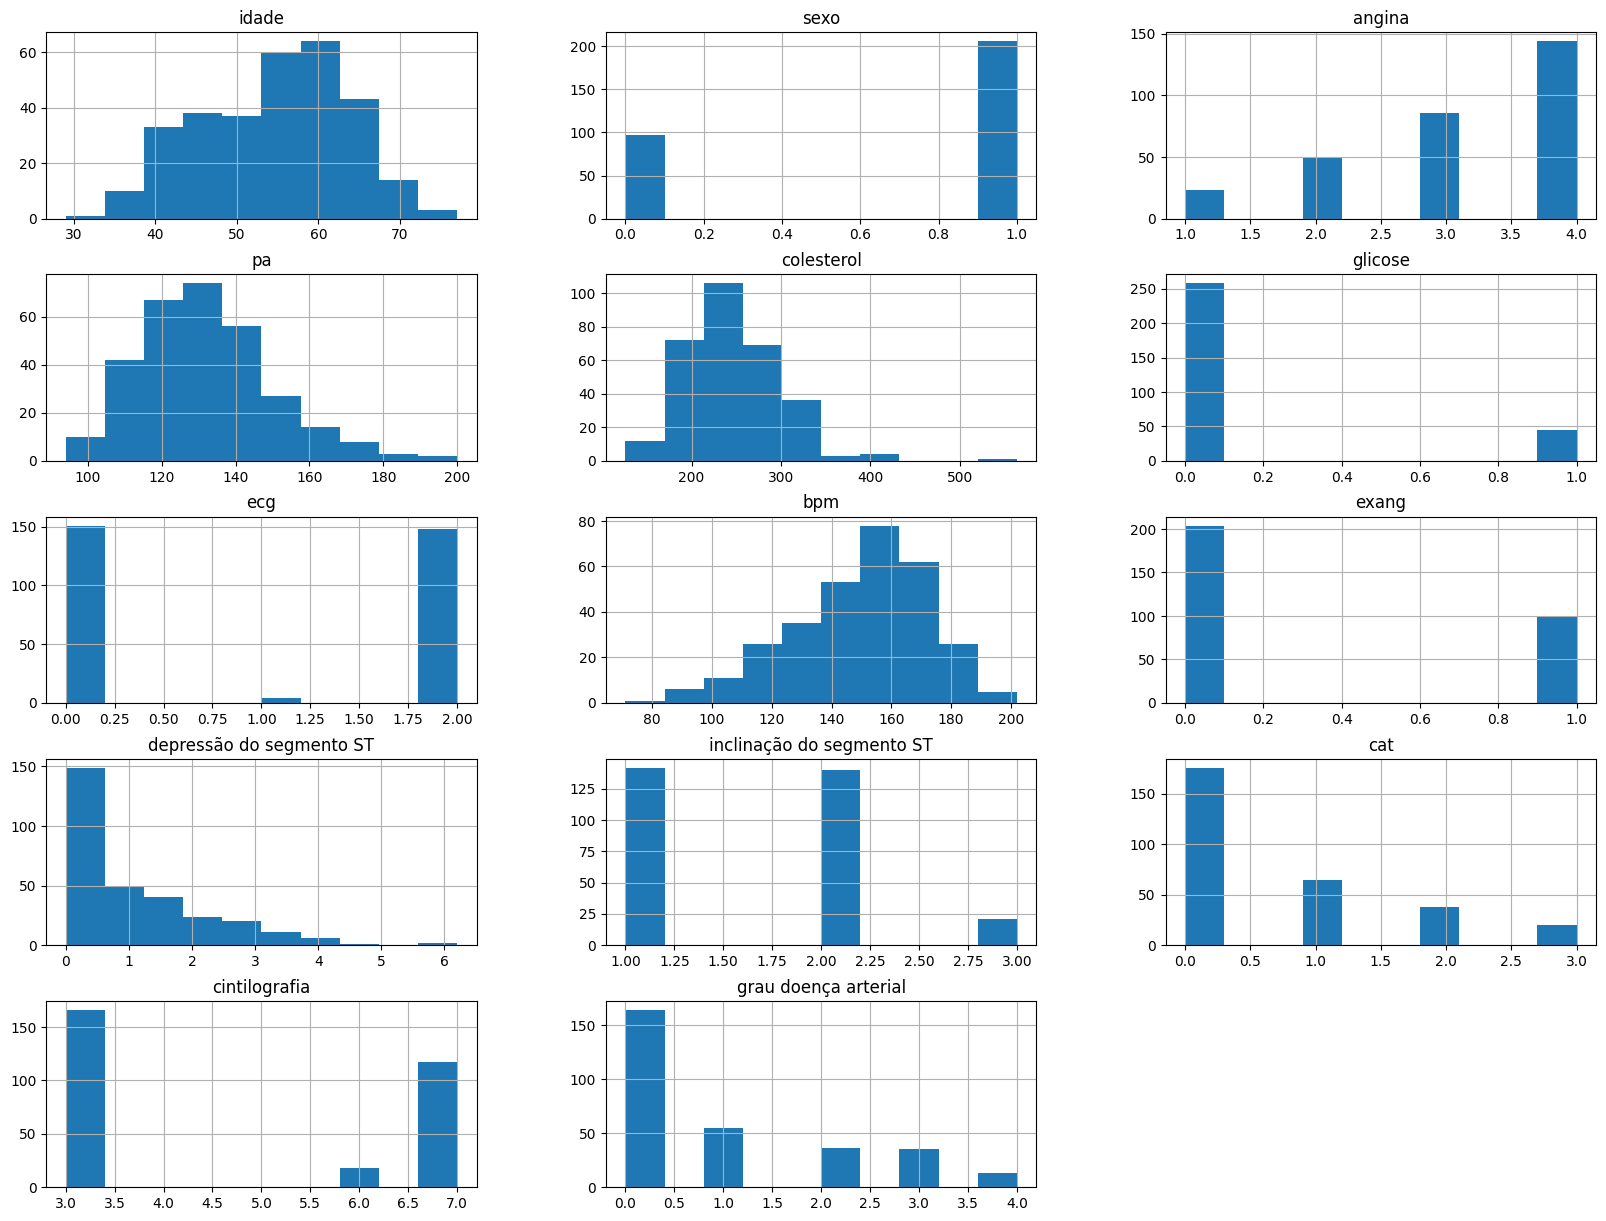

In [15]:
# Histograma
heart_disease.hist(figsize = (20,15), layout = (5,3))
plt.show()

O density plot, é uma visualização gráfica que mostra a distribuição de um conjunto de dados contínuos. É uma forma de representar a densidade de probabilidade de uma variável aleatória.

Para o Density Plot ou Gráfico de Densidade, resolvi utilizar apenas as variáveis contínuas. Vou separar em um subset do heart_disease apenas as variáveis continuas e o nosso target (até o momento) e depois gerar os gráficos


Podemos constatar que os nossos atributos (dentre eles idade, pressão arterial e colesterol que foram mencionados nos fatores de risco) possuem uma concentração com distribuição normal entre os valores e assim como a análise dos histogramas acima possuem maior concentração muito próximo da media.

In [16]:
# Separando as variáveia contínuas em um subset do heart_disease e preparando os títulos para os gráficos
heart_disease_continuas = heart_disease[["idade", "pa", "colesterol", "bpm", "depressão do segmento ST","grau doença arterial"]] 
titulos_heart_disease_continuas = ["Distribuição da idade dos pacientes", "Distribuição da Pressão Arterial", "Distribuição das taxas de Colesterol", \
                                   "Distribuição dos valores dos Batimentos Cardíacos", "Distribuição da Depressão do Segmento ST", "Distribuição do Grau de Doença Arterial"]

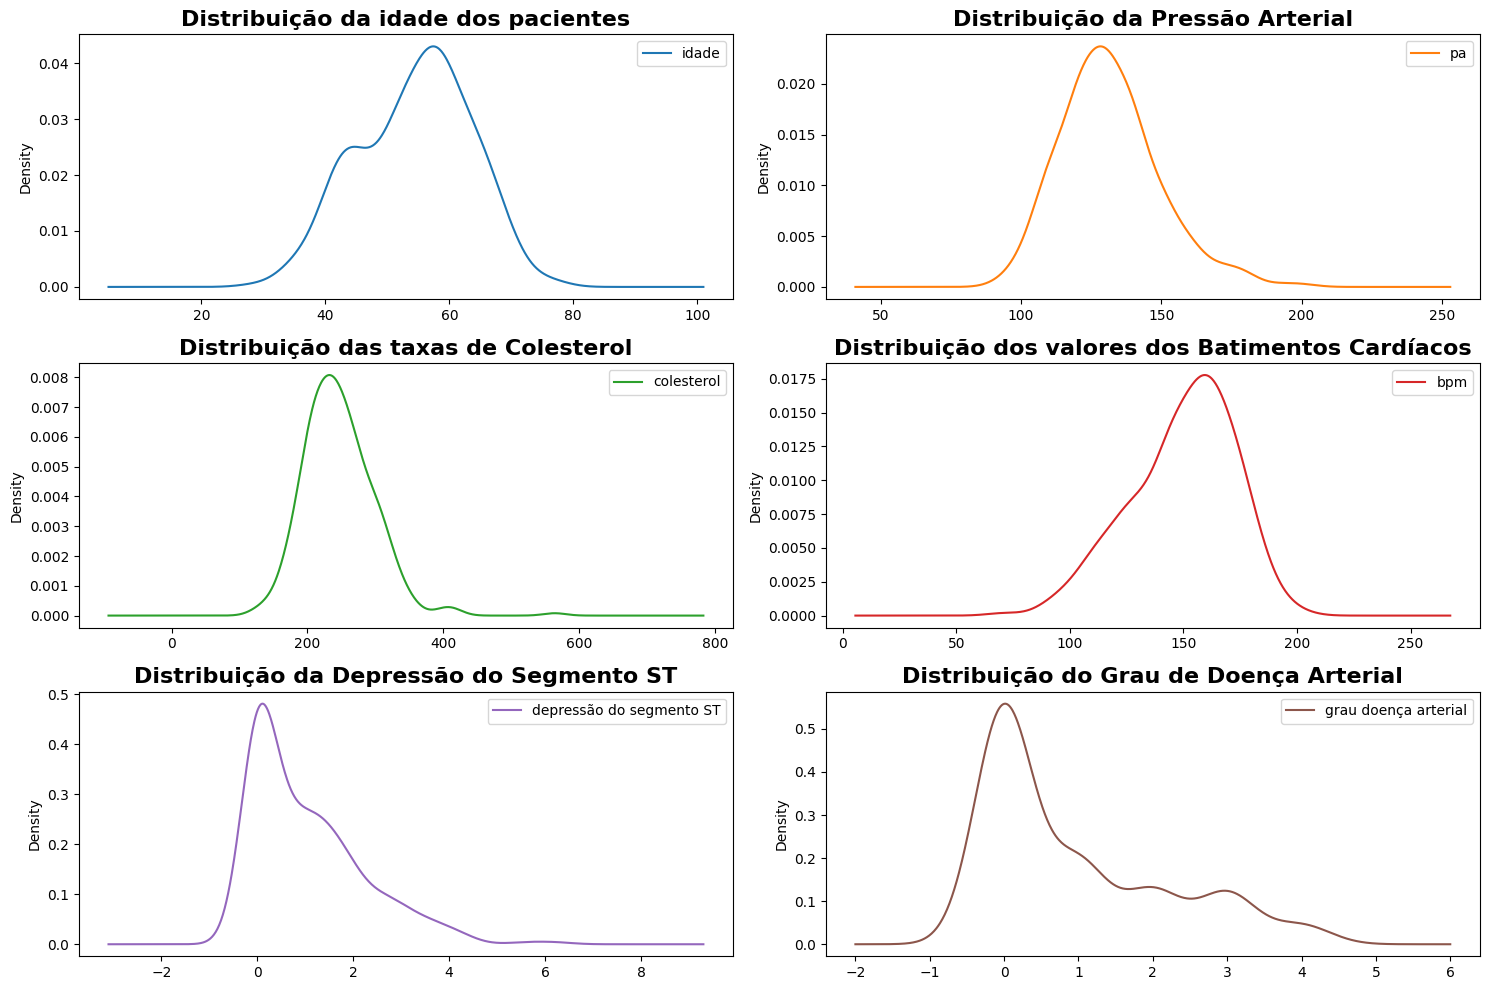

In [17]:
# Density Plot apenas das variáveis continuas
heart_disease_continuas.plot(kind='density', subplots=True, layout=(3,2), sharex=False, figsize=(15,10), grid=False)
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(titulos_heart_disease_continuas[i], fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


### 3.3 Visualizações Categóricas

Nos gráficos anteriores vimos as variáveis contínuas, agora analizaremos a distribuição de algumas variáveis categóricas atravez do gráfico de pizza.

Como a definição dos gráficos ficou grande, vou analisa-los após os mesmos.

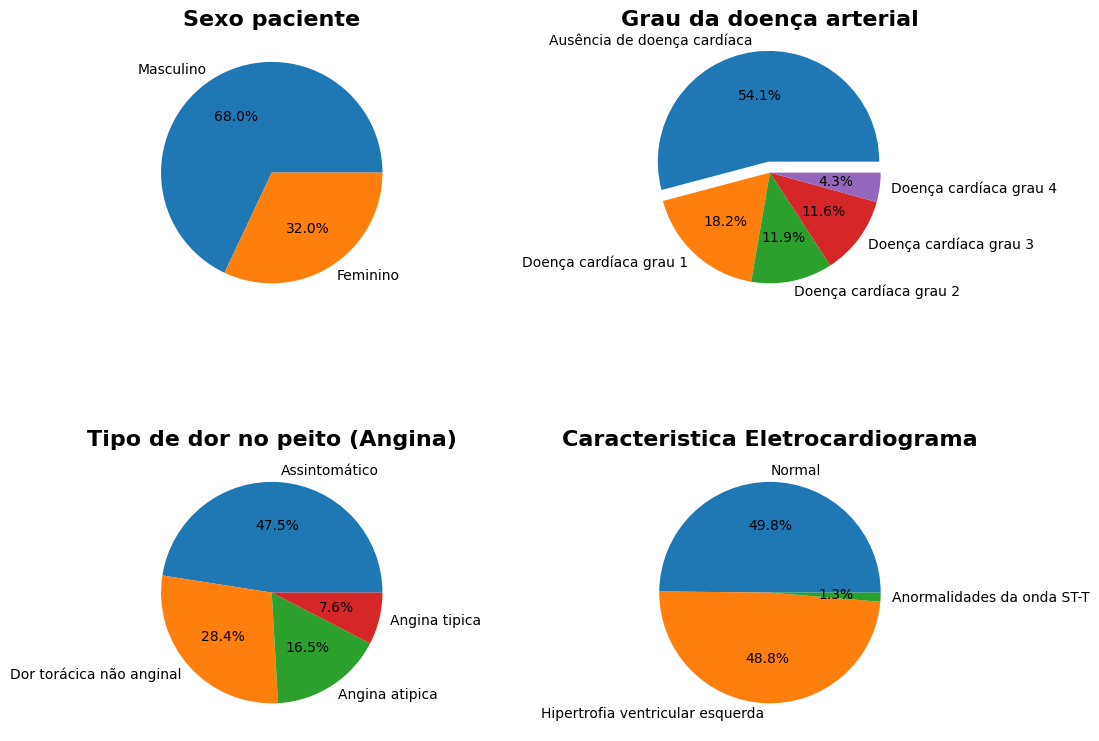

In [18]:
# cria um layout de subplot com 2 linhas e 2 colunas
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
# Prepara de forma dinâmica os rótulos para a distribuição de sexo
indice_sexo = heart_disease["sexo"].value_counts().index
df_pizza_sexo = pd.DataFrame({'valor': indice_sexo})
# Transforma os valores de numeros para texto para os rotulos
df_pizza_sexo['rotulo'] = pd.Series(dtype='object')
df_pizza_sexo.loc[df_pizza_sexo['valor'] == 0, 'rotulo'] = 'Feminino'
df_pizza_sexo.loc[df_pizza_sexo['valor'] == 1, 'rotulo'] = 'Masculino'
# cria o gráfico de pizza para a distribuição de sexo
heart_disease['sexo'].value_counts().plot(kind='pie', ax=axs[0,0], autopct='%1.1f%%', legend=False, \
                                          labels=df_pizza_sexo['rotulo'], ylabel="")
axs[0,0].set_title("Sexo paciente", fontsize=16, fontweight="bold")

# Prepara de forma dinâmica os rótulos para o grau da doença arterial
indice_doenca_arterial = heart_disease["grau doença arterial"].value_counts().index
df_pizza_doenca_arterial = pd.DataFrame({'valor': indice_doenca_arterial})
# Transforma os valores de numeros para texto para os rotulos
df_pizza_doenca_arterial['rotulo'] = pd.Series(dtype='object')
df_pizza_doenca_arterial.loc[df_pizza_doenca_arterial['valor'] == 0, 'rotulo'] = 'Ausência de doença cardíaca'
df_pizza_doenca_arterial.loc[df_pizza_doenca_arterial['valor'] == 1, 'rotulo'] = 'Doença cardíaca grau 1'
df_pizza_doenca_arterial.loc[df_pizza_doenca_arterial['valor'] == 2, 'rotulo'] = 'Doença cardíaca grau 2'
df_pizza_doenca_arterial.loc[df_pizza_doenca_arterial['valor'] == 3, 'rotulo'] = 'Doença cardíaca grau 3'
df_pizza_doenca_arterial.loc[df_pizza_doenca_arterial['valor'] == 4, 'rotulo'] = 'Doença cardíaca grau 4'
# cria o gráfico de pizza para o grau da doença arterial
explode = (0.1, 0.0, 0.0, 0.0, 0.0)
heart_disease['grau doença arterial'].value_counts().plot(kind='pie', ax=axs[0,1], autopct='%1.1f%%', legend=False, \
                                                          labels=df_pizza_doenca_arterial['rotulo'], explode=explode, ylabel="")
axs[0,1].set_title("Grau da doença arterial", fontsize=16, fontweight="bold")

# Prepara de forma dinâmica os rótulos para o tipo de dor no peito
indice_angina = heart_disease["angina"].value_counts().index
df_pizza_angina = pd.DataFrame({'valor': indice_angina})
# Transforma os valores de numeros para texto para os rotulos
df_pizza_angina['rotulo'] = pd.Series(dtype='object')
df_pizza_angina.loc[df_pizza_angina['valor'] == 1, 'rotulo'] = 'Angina tipica'
df_pizza_angina.loc[df_pizza_angina['valor'] == 2, 'rotulo'] = 'Angina atipica'
df_pizza_angina.loc[df_pizza_angina['valor'] == 3, 'rotulo'] = 'Dor torácica não anginal'
df_pizza_angina.loc[df_pizza_angina['valor'] == 4, 'rotulo'] = 'Assintomático'
# cria o gráfico de pizza para o tipo de dor no peito
heart_disease['angina'].value_counts().plot(kind='pie', ax=axs[1,0], autopct='%1.1f%%', legend=False, \
                                            labels=df_pizza_angina['rotulo'], ylabel="")
axs[1,0].set_title("Tipo de dor no peito (Angina)", fontsize=16, fontweight="bold")

# Prepara de forma dinâmica os rótulos para o resultado do Eletrocardiograma
indice_ecg = heart_disease["ecg"].value_counts().index
df_pizza_ecg = pd.DataFrame({'valor': indice_ecg})
# Transforma os valores de numeros para texto para os rotulos
df_pizza_ecg['rotulo'] = pd.Series(dtype='object')
df_pizza_ecg.loc[df_pizza_ecg['valor'] == 0, 'rotulo'] = 'Normal'
df_pizza_ecg.loc[df_pizza_ecg['valor'] == 1, 'rotulo'] = 'Anormalidades da onda ST-T'
df_pizza_ecg.loc[df_pizza_ecg['valor'] == 2, 'rotulo'] = 'Hipertrofia ventricular esquerda'
# cria o gráfico de pizza para a resultado do Eletrocardiograma
heart_disease['ecg'].value_counts().plot(kind='pie', ax=axs[1,1], autopct='%1.1f%%', legend=False, \
                                         labels=df_pizza_ecg['rotulo'], ylabel="")
axs[1,1].set_title("Caracteristica Eletrocardiograma", fontsize=16, fontweight="bold")

# ajusta o espaçamento entre subplots
plt.subplots_adjust(wspace=0.8, hspace=0.2)

# exibe o gráfico
plt.show()


Olhando para o primeiro gráfico constatamos que as doenças cardíacas são mais frequentes em pessoal do sexo masculino do que em pessoas do sexo feminino. Isso se dá principalmente por causa de fatores biológicos e comportamentais mais prevalentes nos individuos do sexo masculino, como maior consumo de tabaco e álcool, maior exposição a estresse ocupacional e menor adesão a hábitos saudáveis. 

Quando olhamos para o gráfico de Grau de Doença Cardíaca observamos que mesmo essa categoria possuindo 5 divisões, A ocorrência de casos de presença de doenças cardíacas e ausência de doenças cardíacas estão quase iguais com uma leve predominância de pacientes sãos.

O atributo Angina do terceiro gráfico se refere à dor torácica do paciente e é uma das características mais importantes para o diagnóstico de doenças cardíacas. Ele é dividido em quatro categorias. A presença de angina típica pode indicar uma doença cardíaca coronária, enquanto a angina atípica pode estar relacionada a outras condições cardíacas. Dor não anginal e assintomática, que juntas somam aproximadamente 75% dos casos, não são específicas de doenças cardíacas.

Por fim, no ultimo gráfico analisamos os resultados do eletrocardiograma em repouso. Ele pode ter três valores, O valor Normal indica que não há alterações significativas no exame, enquanto os valores Anormalidades da onda ST-T e Hipertrofia ventricular esquerda indicam diferentes graus de anormalidades. Notamos um equilibrio entre os resultados normais e alterados do eletrocardiograma.

### 3.4 O BoxPlot

O box plot é um gráfico que apresenta a distribuição de um conjunto de dados numéricos através de cinco estatísticas: valor mínimo, primeiro quartil, mediana, terceiro quartil e valor máximo. Ele é composto por um retângulo (a caixa), que se estende do primeiro ao terceiro quartil, uma linha vertical que representa a mediana e dois segmentos de reta (os bigodes) que se estendem aos valores mínimo e máximo. 

Vamos utilizar o box plot para identificar a dispersão e a presença de outliers no nosso conjunto de dados. Usaremos novamente o nosso dataset reduzido com as variáveis contínuas (heart_disease_continuas)

Alguns possíveis outliers são evidenciados nos gráficos. Podemos entender que tanto valores de 200 para máxima de pressão arterial quanto 71 para batimentos cardíacos são valores que podem ocorrer porém níveis de Colesterol acima de 400 e Depressão do segmento ST no Eletrocardiograma acima de 4,5 podem ser considerados outliers e serão devidamente tratados posteriormente


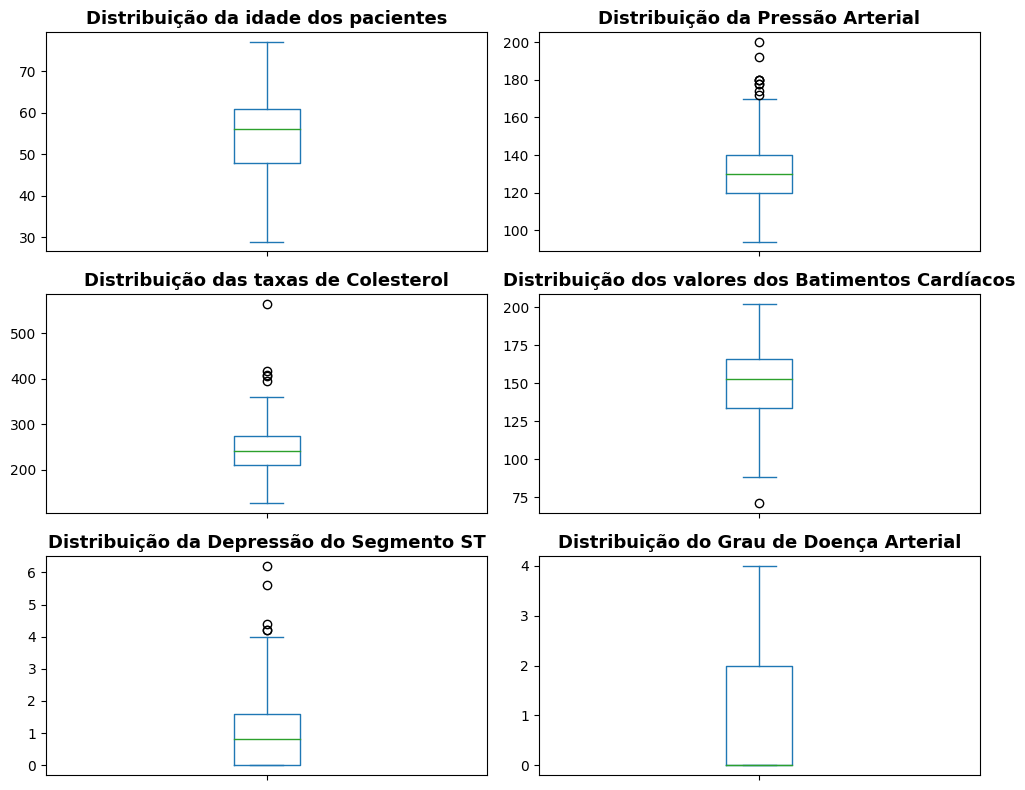

In [19]:
# Gráfico box plot
# Monta lista com os títulos para o dataset reduzido heart_disease_continuas
#titulos_heart_disease_continuas = ['Idade paciente', 'Pressão arterial', 'Nivel de colesterol', 'Batimentos cardíacos por minuto', 'Depressão do segmento ST no Eletrocardiograma', 'Extensão da doença arterial']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
for i, ax in enumerate(axs.flatten()):
    heart_disease_continuas.iloc[:,i].plot(kind = 'box', ax=ax)
    ax.set_title(titulos_heart_disease_continuas[i], fontsize=13, fontweight='bold')
    ax.grid(False)
    ax.tick_params(axis='x', labelbottom=False)
plt.tight_layout()


### 3.5 Visualizações Multimodais

Visualizações multimodais referem-se ao uso de diferentes tipos de gráficos e técnicas de visualização para explorar e entender os dados. A ideia é aproveitar as diferentes visualizações para obter insights que não seriam possíveis com apenas um tipo de gráfico.


Uma matriz de correlação é uma tabela que mostra como duas variáveis ​​se relacionam entre si. O valor da correlação varia de -1 a 1, sendo -1 uma relação negativa (quando uma aumenta a outra diminui), 0 nenhuma relação e 1 uma relação positiva (quando uma aumenta a outra aumenta também). Um heatmap é uma forma visual de representar essa matriz, onde os valores mais altos aparecem em cores mais intensas, enquanto os valores mais baixos aparecem em cores mais suaves. Isso ajuda a identificar rapidamente as relações mais fortes e mais fracas entre as variáveis.


Podemos verificar no grafico abaixo que não existem atributos fortemente relacionados. Vemos no entanto a nossa variável target (grau doença arterial) com um relacionamento positivo moderado com a depressão do segmento ST (eletrocardiograma) o que pode começar a responder nossos questionamentos iniciais sobre testes cardíacos, como o ECG, poderem fornecer informações úteis para prever a presença de doença cardíaca.


Vemos também que tanto o target quanto a idade possuem uma corelação negativa moderada com os batimentos cardíacos (bpm) e a pressão arterial possue uma leve tendencia a uma correlação positiva com idade. Esses tres pontos estão dentro do esperado visto que com o aumento da idade o normal é ter um aumento da pressão arterial e de doenças cardíacas e também uma diminuição dos batimentos cardíacos (recem nascidos 130bpm / idosos 60bpm).

Um ponto que chama atenção é o colesterol que em taxas elevadas normalmente é associado a problemas cardíacos mas está apresentando uma correlação positiva porém bem fraca com o target.


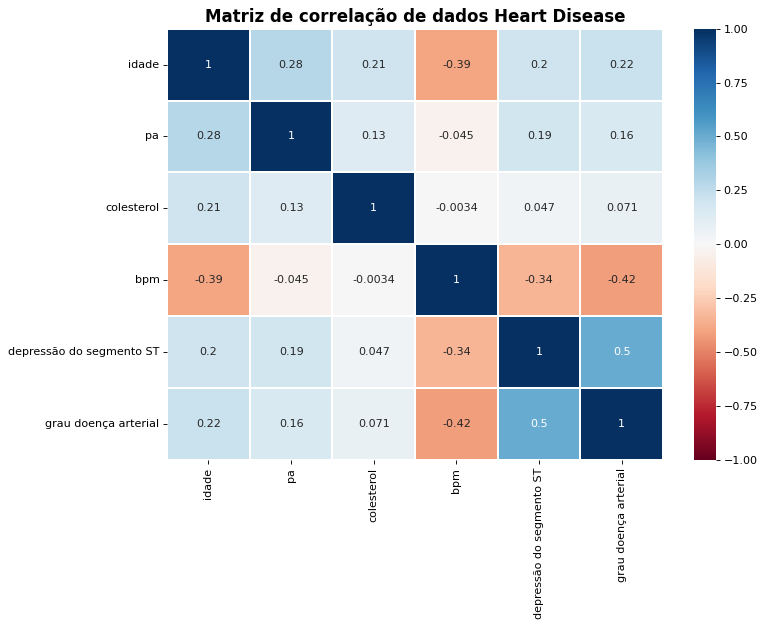

In [20]:
# Matriz de Correlação com Matplotlib Seaborn para o subset de variáveis contínuas
fig, ax = plt.subplots(figsize=(10, 7), dpi=80)
ax.set_title("Matriz de correlação de dados Heart Disease", fontsize=15, fontweight='bold')
sns.heatmap(heart_disease_continuas.corr(), annot=True, cmap='RdBu', linewidths=0.3, ax=ax, vmin=-1, vmax=1);


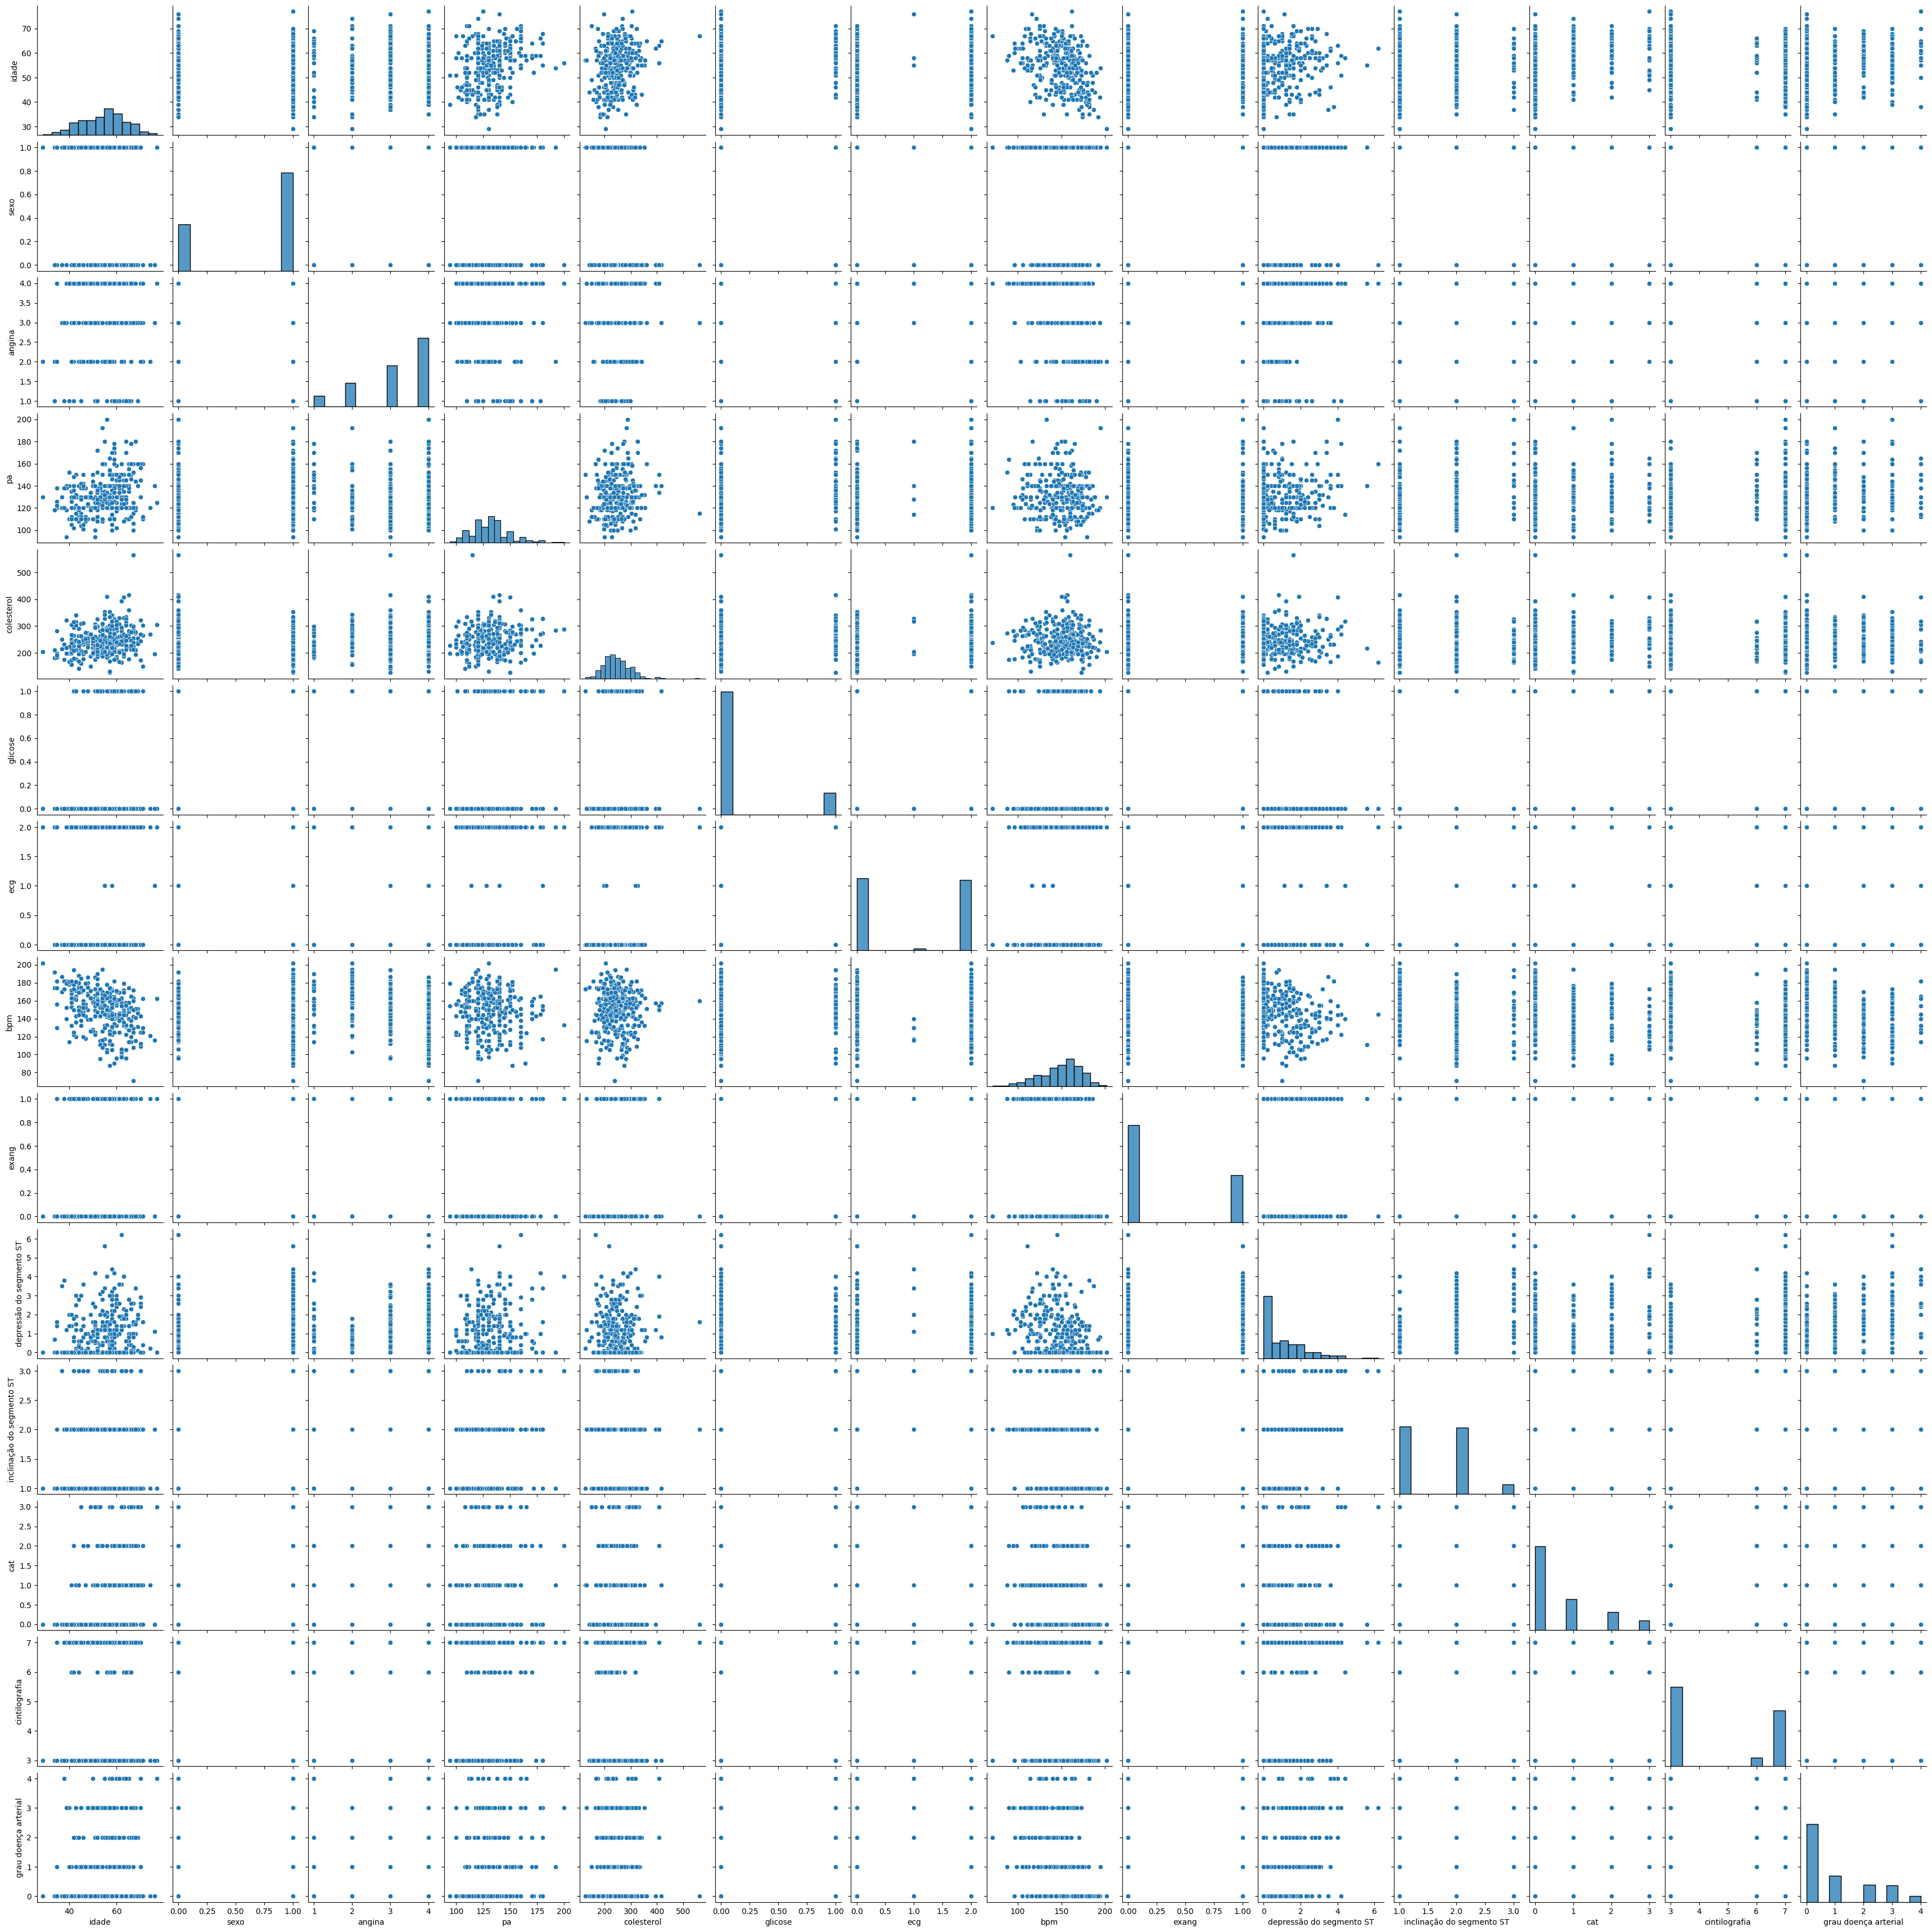

In [21]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(heart_disease)

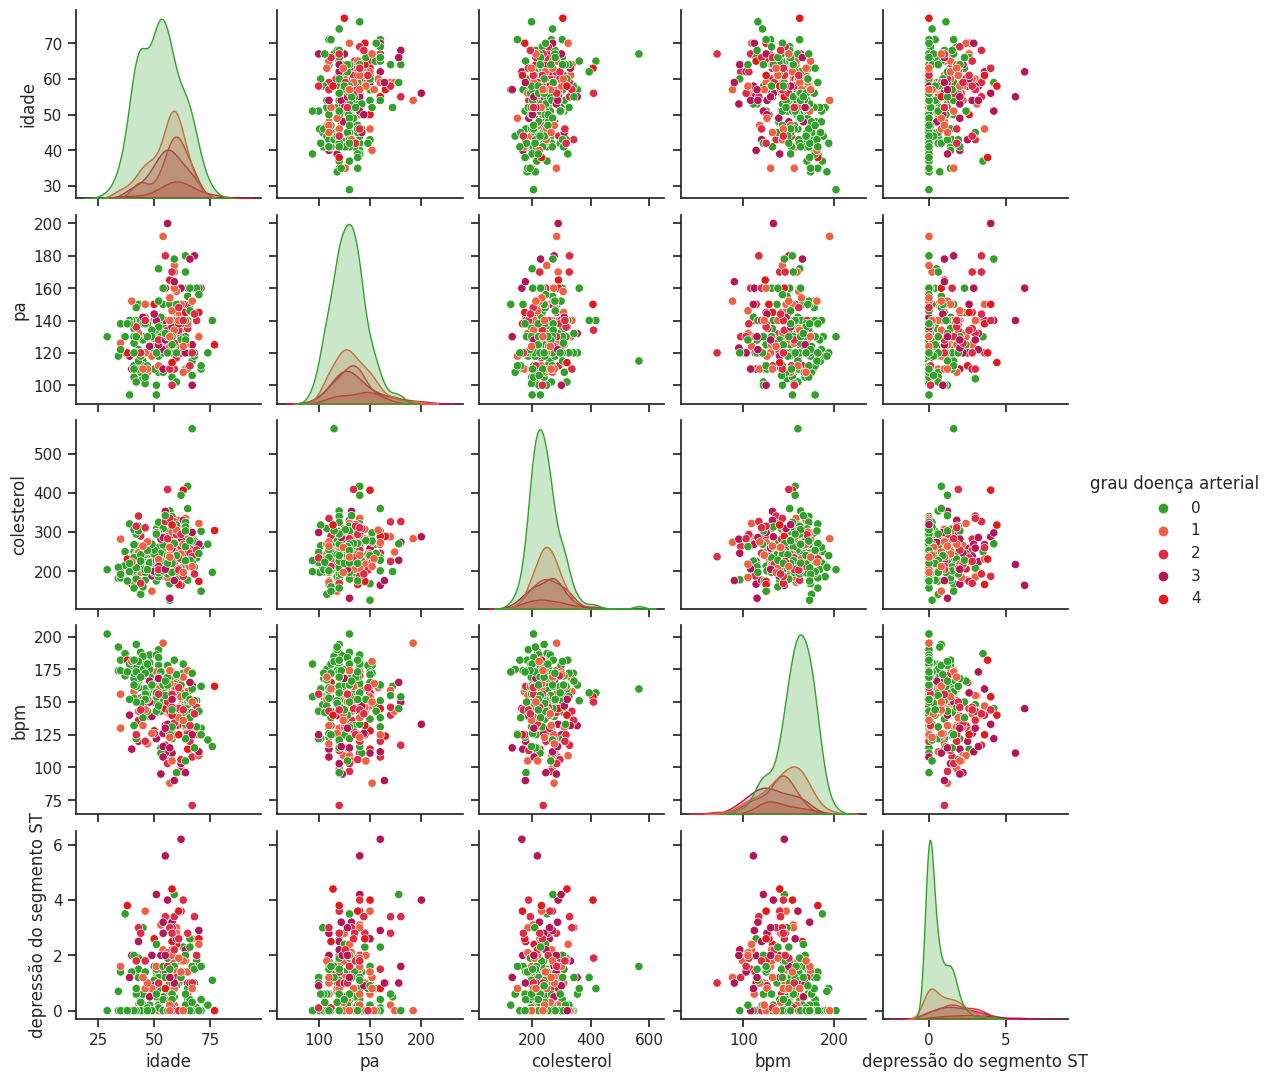

In [54]:
# Scatter Plot com Seaborn - Variação 2
# Definindo estilo e as paletas de cores que serão usadas
sns.set(style="ticks", color_codes=True)
palette1_colors = sns.color_palette("Paired")
palette2_colors = sns.color_palette("rocket", 8)

# Definindo as cores usadas e de qual paleta
color_0 = palette1_colors[3]
color_1 = palette2_colors[5]
color_2 = palette2_colors[4]
color_3 = palette2_colors[3]
color_4 = palette1_colors[5]
paleta_grau_doenca_arterial = [color_0, color_1, color_2, color_3, color_4]

sns.pairplot(heart_disease_continuas, hue="grau doença arterial", palette=paleta_grau_doenca_arterial , height = 2.2)




In [23]:
# Convertendo os atributos para int
#heart_disease[["idade", "sexo", "angina", "pa", "colesterol", "glicose", "ecg", "bpm", "exang", "grau doença arterial"]] = \
#heart_disease[["idade", "sexo", "angina", "pa", "colesterol", "glicose", "ecg", "bpm", "exang",  "grau doença arterial"]].astype(int)

#heart_disease[["número de vasos", "thalassemia"]] = heart_disease[["número de vasos", "thalassemia"]].apply(pd.to_numeric, errors='coerce')
#heart_disease[["número de vasos", "thalassemia"]] = heart_disease[["número de vasos", "thalassemia"]].astype(int)

In [24]:
#heart_disease.isnull().sum()

In [25]:
#heart_disease.replace("?", np.nan, inplace=True)
#print(heart_disease.isna().sum())

In [26]:
#print(heart_disease.describe())
#heart_disease['cat'].value_counts()

[Text(32.25, 0.5, 'colesterol')]

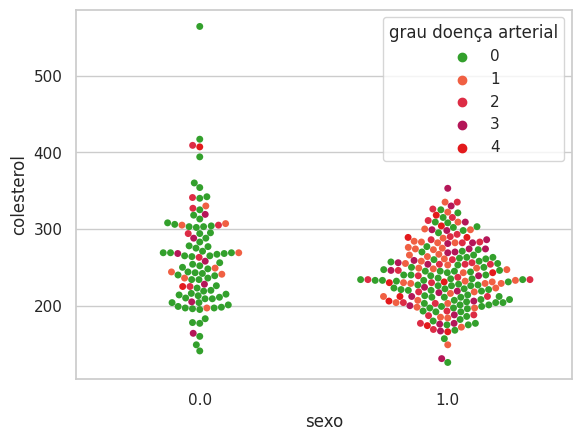

In [27]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Load the penguins dataset
#df = sns.load_dataset("heart")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=heart_disease, x="sexo", y="colesterol", hue="grau doença arterial", palette=palette)
ax.set(ylabel="colesterol")

[Text(32.25, 0.5, 'Pressão Arterial')]

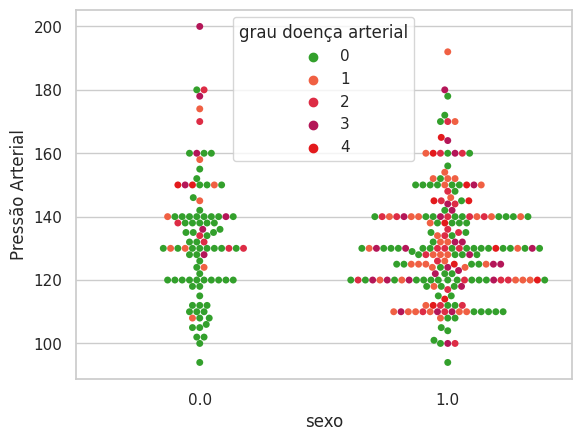

In [28]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=heart_disease, x="sexo", y="pa", hue="grau doença arterial", palette=palette)
ax.set(ylabel="Pressão Arterial")

[Text(32.25, 0.5, 'Batimentos Cardíacos')]

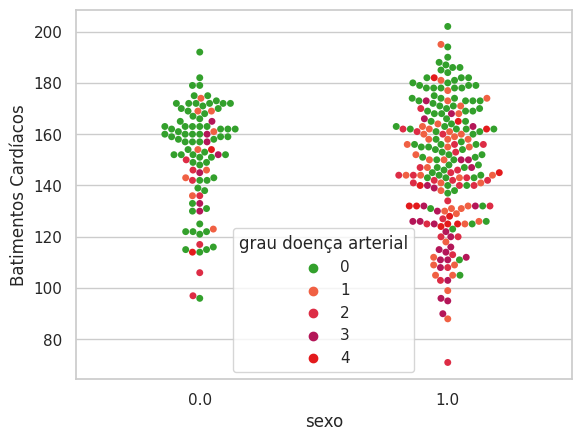

In [29]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=heart_disease, x="sexo", y="bpm", hue="grau doença arterial", palette=palette)
ax.set(ylabel="Batimentos Cardíacos")

Age vs trestbps(Heart Diseased Patinets)


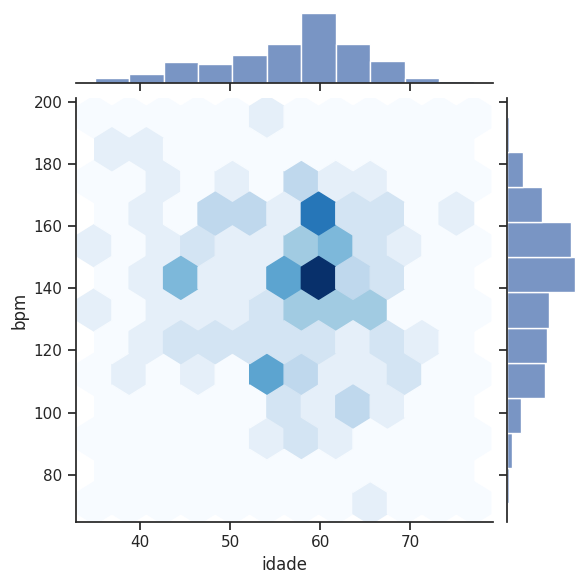

In [51]:
df3 = heart_disease[heart_disease['grau doença arterial'] != 0 ][['idade', 'sexo', 'angina', 'pa', 'colesterol', 'glicose', 'ecg', 'bpm',
       'exang', 'depressão do segmento ST', 'inclinação do segmento ST', 'cat', 'cintilografia', 'grau doença arterial']] 
#target 0 - people with heart disease
#pal = sns.cubehelix_palette(rot=-.2)
print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='idade',
              y='bpm',
              kind='hex',
              cmap='Blues'
           
              )

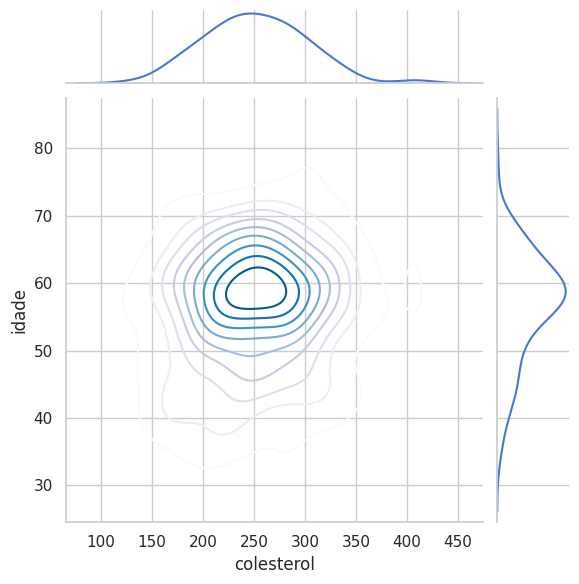

In [31]:
sns.jointplot(data=df3,
              x='colesterol',
              y='idade',
              kind='kde',
              cmap='PuBu'
              )

In [32]:
#penguins = sns.load_dataset("heart")
# df4 = heart_disease[['idade', 'pa', 'colesterol',  'bpm', 'grau doença arterial']] 

# g = sns.PairGrid(df4)
# g = sns.PairGrid(df4, hue="grau doença arterial", palette=palette)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.swarmplot) #scatterplot
# g.add_legend()

<Axes: title={'center': 'Finding Null Values Using Heatmap\n'}>

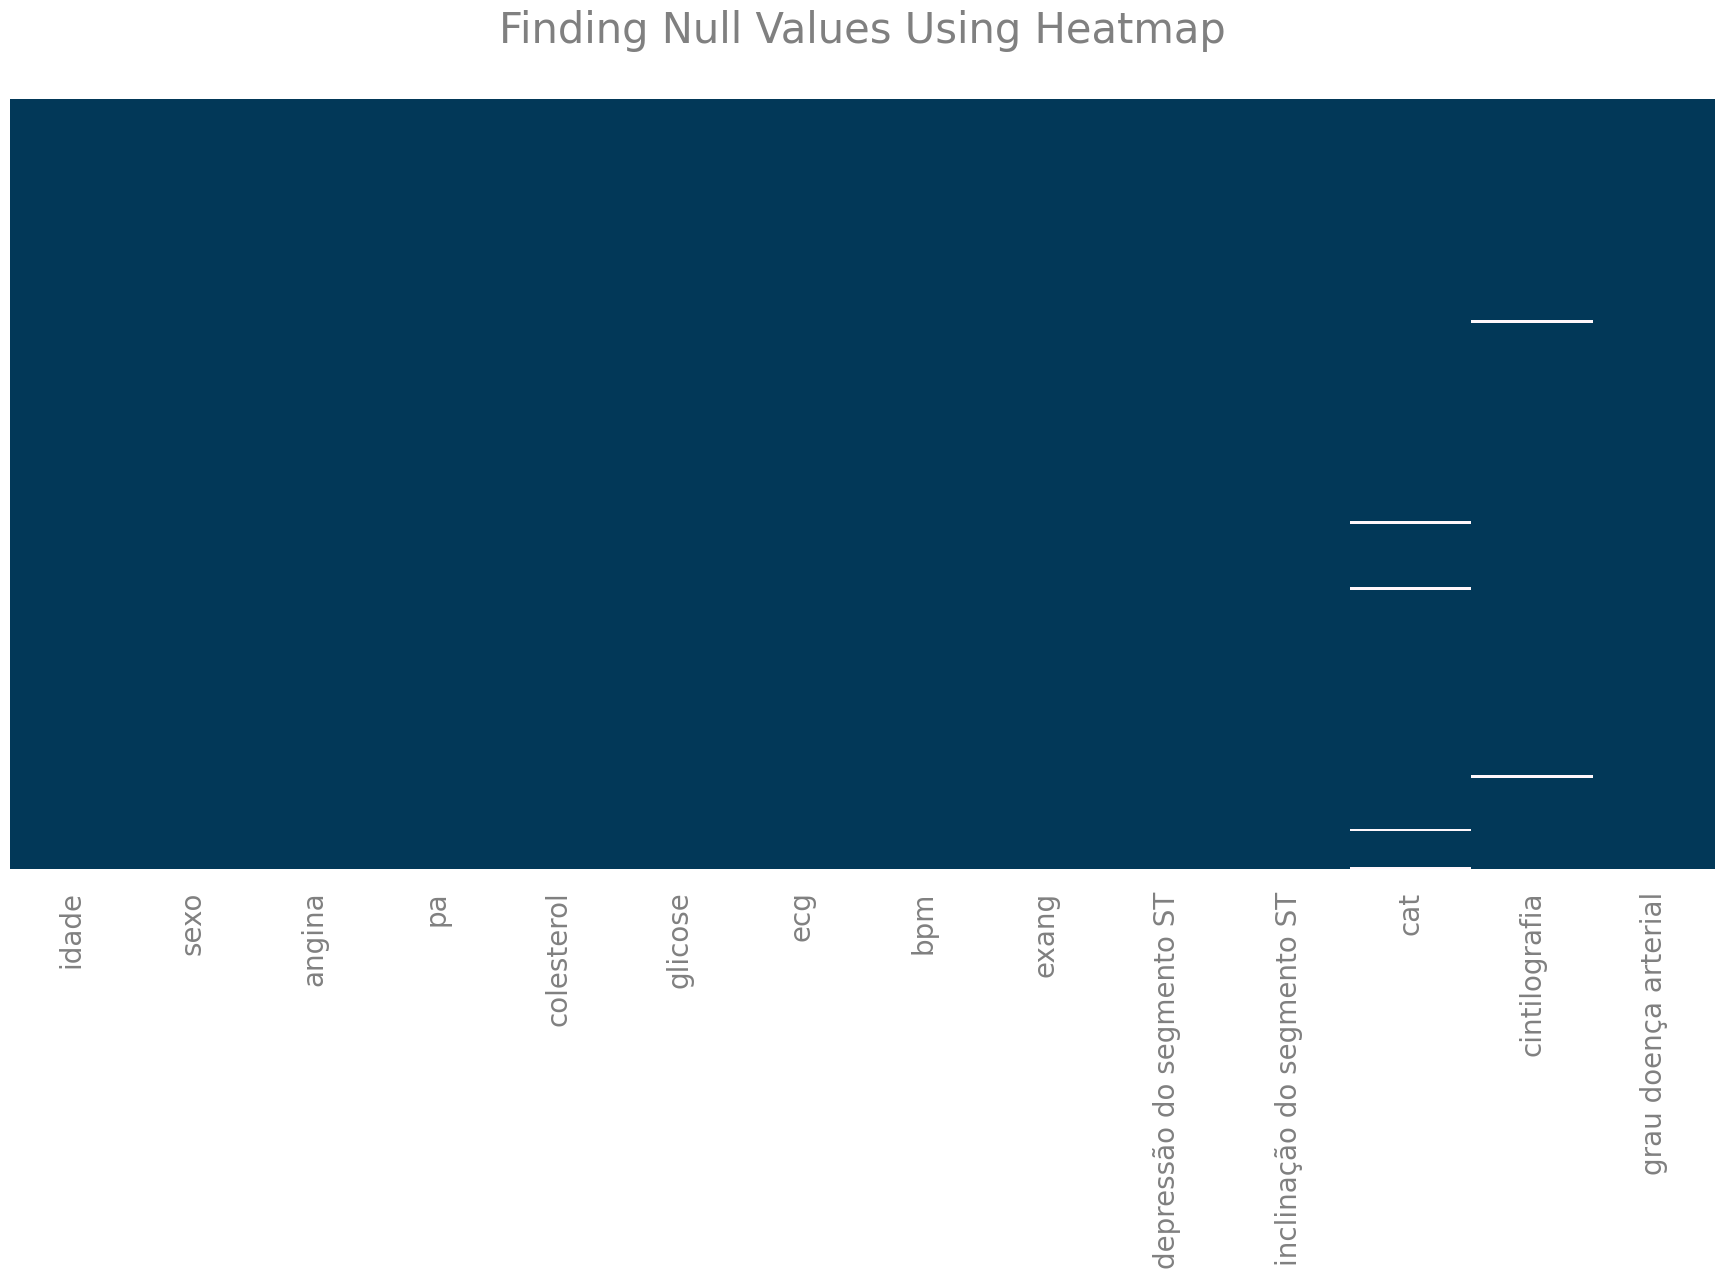

In [33]:
#visualizing Null values if it exists 
plt.figure(figsize=(22,10))
plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')
plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)
sns.heatmap(heart_disease.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

<Axes: >

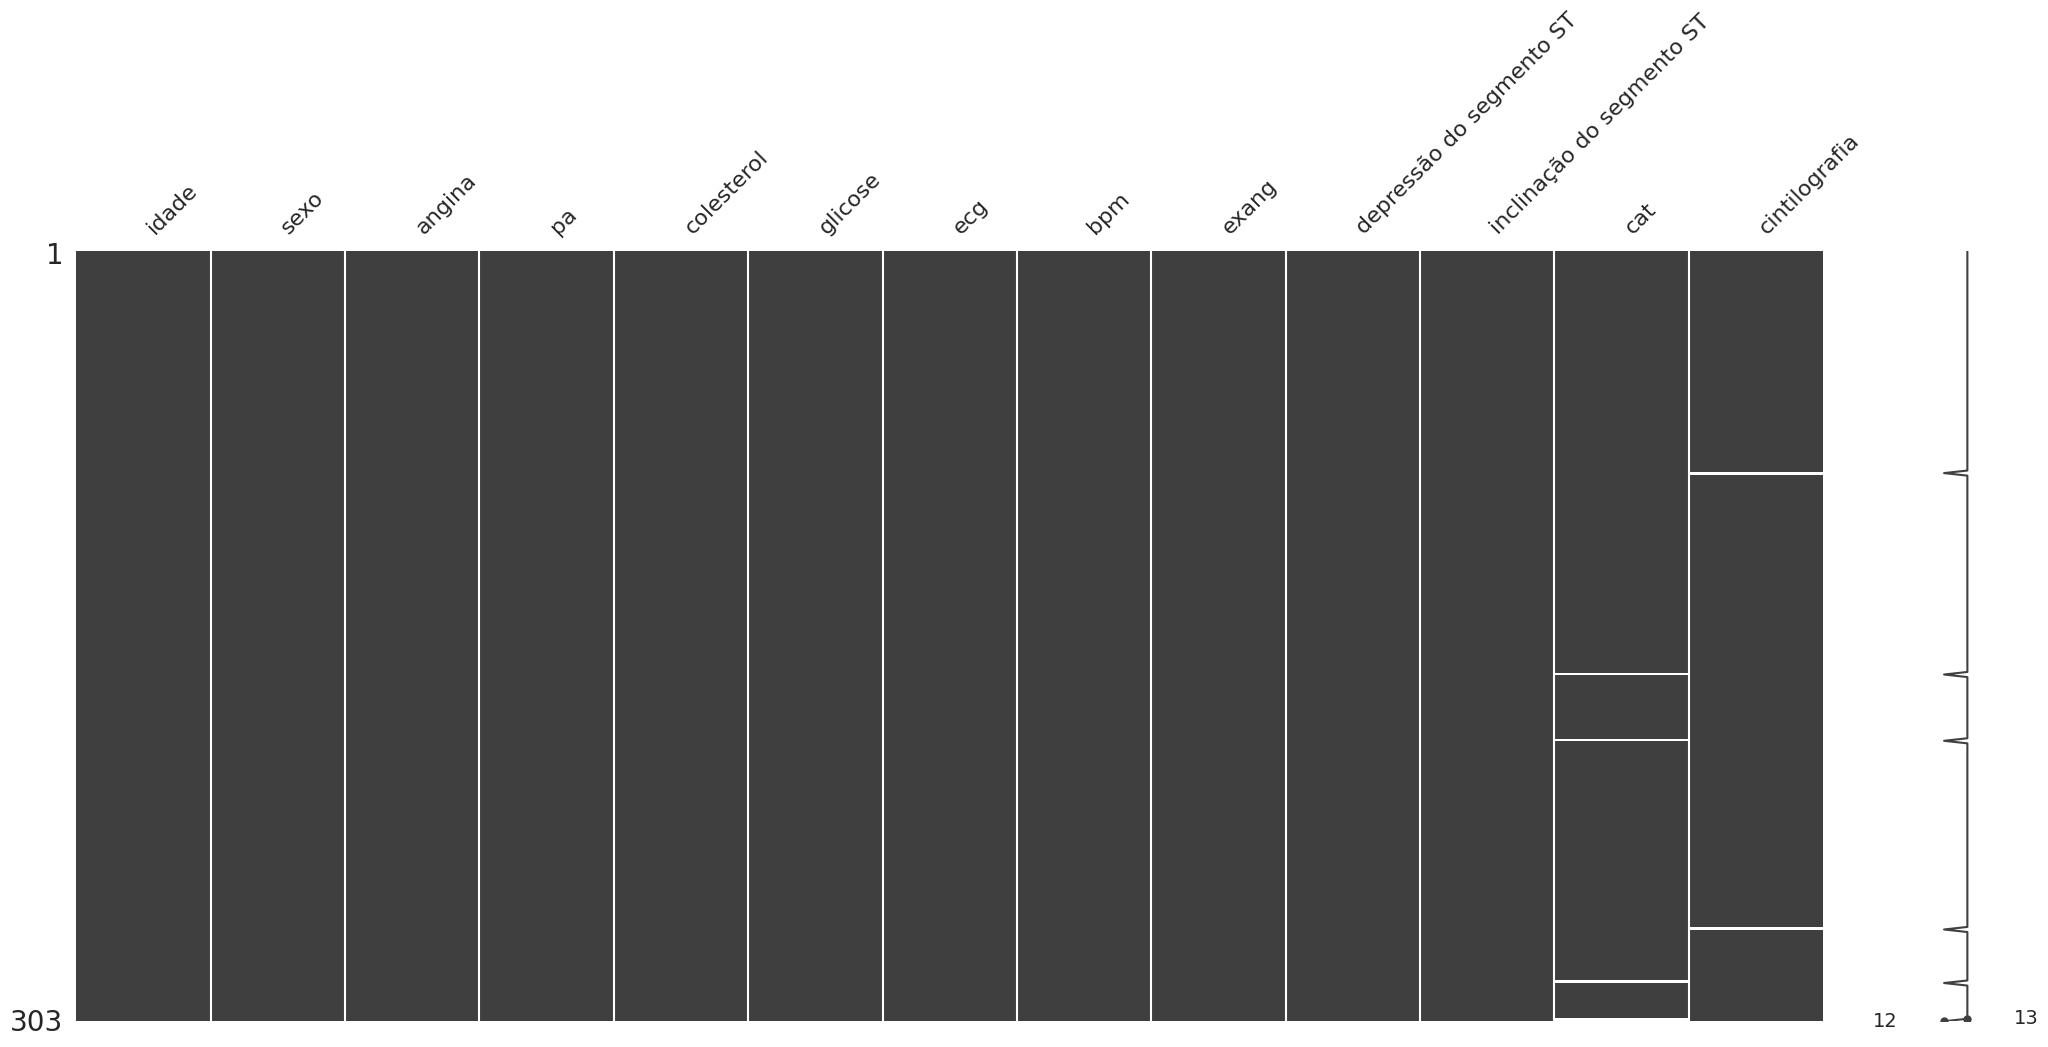

In [34]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(heart_disease.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = heart_disease[col[0:-1]]

# substituindo os zeros por NaN
#atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)